<img src="res/logo/coolpi.png" width="200">

# Coolpi Notebook

# 06 - Image Objects

## Import packages 

In [1]:
import sys
sys.version

'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [2]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# SPD Illuminant

In [3]:
from coolpi.colour.cie_colour_spectral import MeasuredIlluminant

JNA

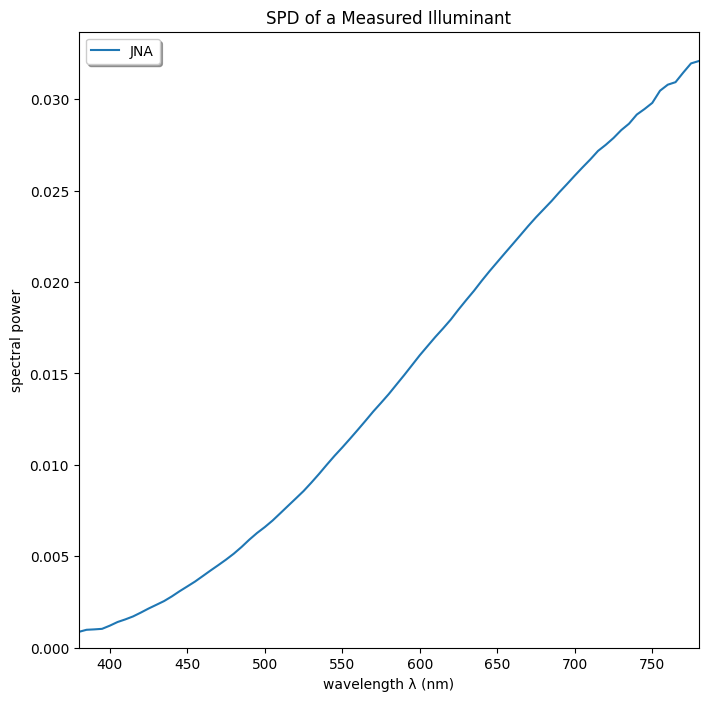

In [4]:
file_spd = ["res", "spd", "SPD_15_JNA_2022-06-19_02°_2681K.csv"]
path_spd = os.path.join(*file_spd)

instrument_metadata = {"Date": [[2022,6,19], [9,29,43]], "Measuring Mode": "Ambient", "Viewing Angle":2}

JNA = MeasuredIlluminant(illuminant_name="JNA", path_file = path_spd, metadata= instrument_metadata, normalised=False)

JNA.plot()

# RawImage

In [5]:
from coolpi.image.image_objects import RawImage

### To create an instance:

To create an instance of the `RawImage` class, simply enter the required parameters as follows:

In [6]:
file_raw = ["res", "img", "INDIGO_2022-06-19_NikonD5600_0017.NEF"]
path_raw  = os.path.join(*file_raw)

Optional

In [7]:
metadata = {"Camera": "Nikon D5600", "image_size":[4008, 6008], "Date": [[2022, 6, 19], [8, 29, 00]], "ColorChecker": "XRCCPP", "illuminant":JNA, "observer": 2}

Note: The *RawImage* metadata can be set separately with the method `.set_metadata(metadata)`

Note: The *RawImage* illuminant and observer can be set separately with the method 

`.set_image_illuminant(illuminant)`

`.set_obsserver(observer)`

In [8]:
raw_image = RawImage(path_raw, metadata, method = "postprocess")

In [9]:
print(raw_image.rgb_data.shape)
print(raw_image.rgb_data[:,:,0].min(), raw_image.rgb_data[:,:,0].max())
print(raw_image.rgb_data[:,:,1].min(), raw_image.rgb_data[:,:,1].max())
print(raw_image.rgb_data[:,:,2].min(), raw_image.rgb_data[:,:,2].max())

(4008, 6008, 3)
9.0 3531.0
15.0 8755.0
0.0 9852.0


In [10]:
raw_image = RawImage(path_raw, metadata, method = "raw_image")

In [11]:
print(raw_image.rgb_data.shape)
print(raw_image.rgb_data[:,:,0].min(), raw_image.rgb_data[:,:,0].max())
print(raw_image.rgb_data[:,:,1].min(), raw_image.rgb_data[:,:,1].max())
print(raw_image.rgb_data[:,:,2].min(), raw_image.rgb_data[:,:,2].max())

(4008, 6008, 3)
9.0 3531.0
15.0 8755.0
0.0 9852.0


Note: Since the results are identical using both methods (data from raw_image, or postprocessing), we will use the rawpy postprocess function: in this way it is not necessary to take into account the sensor rotation angle of some cameras (e.g. Fujifilm). Thus, the RAW RGB data are obtainded automatically.

## Attributes

In [12]:
print(raw_image.type)
print(raw_image.subtype)
print(raw_image.path)
print(raw_image.raw_attributes.keys()) # same as the class method .get_raw_image_information() 
print(raw_image.rgb_data.shape)
print(raw_image.metadata)
print(raw_image.illuminant)
print(raw_image.observer)

Image object
RAW Image object
res/img/INDIGO_2022-06-19_NikonD5600_0017.NEF
dict_keys(['black_level_per_channel', 'camera_whitebalance', 'colour_desc', 'daylight_whitebalance', 'num_colours', 'raw_colours', 'raw_image', 'raw_image_visible', 'raw_pattern', 'xyz_cam_matrix', 'tone_curve', 'white_level', 'raw_image_size', 'processed_image_size'])
(4008, 6008, 3)
{'Camera': 'Nikon D5600', 'image_size': [4008, 6008], 'Date': [[2022, 6, 19], [8, 29, 0]], 'ColorChecker': 'XRCCPP', 'illuminant': <coolpi.colour.cie_colour_spectral.MeasuredIlluminant object at 0x7f9b28f5e5e0>, 'observer': 2}
MeasuredIlluminant object: Illuminant JNA.
2º standard observer (CIE 1931)


Alert: For advanced users, it is possible to access the RAW data before demosaicing by using the method 
`.get_raw_single_channel_from_metadata()`, but the sensor rotation angle shall be taken into account if applicable.

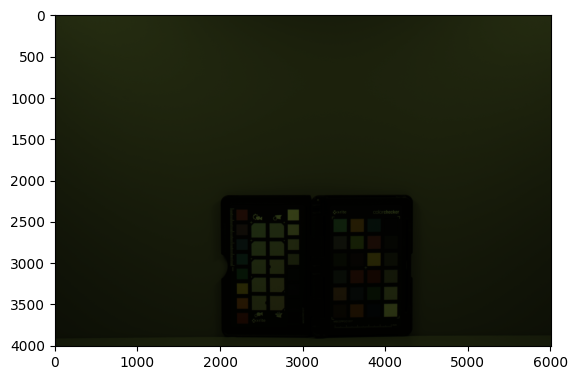

In [13]:
raw_image.show(method="matplotlib")

In [14]:
path_raw  = os.path.join(*["res", "img", "raw_rgb_image.png"]) # your path here
raw_image.save(path_raw)

## Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [15]:
print(raw_image) # str method

RawImage object from path: res/img/INDIGO_2022-06-19_NikonD5600_0017.NEF


## Automatic Image Processing

For the automatic processing of a *RawImage* object, simply enter the required parameters as follows:

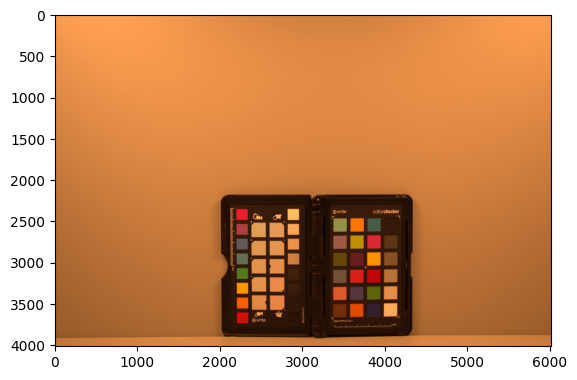

In [16]:
rgb_processed = raw_image.automatic_image_processing(show_image = True, save_image = False, output_path = None, method="matplotlib")

In [17]:
path_out  = os.path.join(*["res", "img", "automatic_image_processing.tif"]) # your path here
rgb_processed = raw_image.automatic_image_processing(show_image = False, save_image = True, output_path = path_out, method="matplotlib")

The default parameters used for the image processing are: AHD demosaicing algorithm, full size, without applying noise reduction and any white balance algorithm, sRGB as output color space, and as an 8 bits image.

However, custom parameters can be introduced as optional `krawargs`, e.g. to apply custom white balance multipliers:

In [18]:
krawargs = dict(use_camera_wb=False, use_auto_wb=False, user_wb=[1.21, 1.0, 2.60, 1.0], output_bps=16)

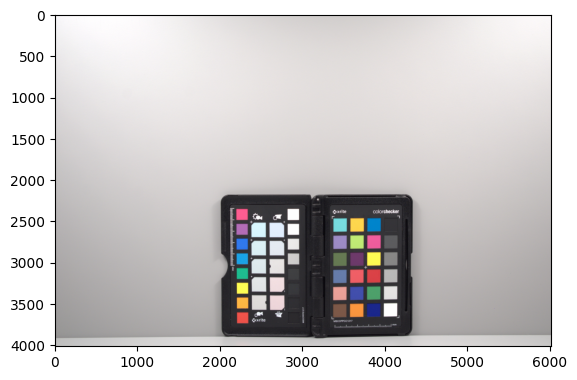

In [19]:
rgb_processed_custom = raw_image.automatic_image_processing(show_image = True, save_image = False, output_path = None, method="matplotlib", **krawargs)

In [20]:
path_out  = os.path.join(*["res", "img", "custom_image_processing_wb_16bits.tif"]) # your path here
rgb_processed_custom = raw_image.automatic_image_processing(show_image = False, save_image = True, output_path = path_out, method="matplotlib", **krawargs)

Note: The *RawImage* automatic image processing does not include a colour correction pipeline.

## RGB Patch data extraction

To extract the RGB data of a simple patch frome the image:

In [21]:
r_grey, g_grey, b_grey = raw_image.extract_rgb_patch_data_from_image([2469,3490], 70) # "F1"
print(r_grey, g_grey, b_grey)

1780.4232653061224 2112.4430612244896 801.9648979591836


### ColourChecker Extraction

The following colour checkers have been implemented:

- Calibrite PASSPORT PHOTO 2: "CCPP2_24", "CCPP2_26".
- Calibrite colorchecker PASSPORT VIDEO: "CCPPV_24", "CCPPV_3".
- Munsell Soil Color Book (Ed.1994): ColourChecker name and page, e.g. "MSCB1994_GLEY1", "MSCB1994_5Y".
- Munsell Soil Color Book (Ed.2009): ColourChecker name and page, e.g. "MSCB2009_GLEY1", "MSCB2009_GLEY2".
- Spyder Checker: SCK100_48, SCK100_7
- X-rite PASSPORT PHOTO: "XRCCPP_24", "XRCCPP_26"

Some of the colour checkers available in coolpy have been separated into smaller sections (either because of their shape, or because they are in single sheets like the Munsell Book).

The corner coordinates shall refer to the markings or crosses if present. In case the colour checker does not have any reference mark, the colour checker should be positioned horizontally so that there are more patches horizontally than vertically. The input coordinates then should correspond to the corners of the outer boundary formed by the colour patches.

For the Munsell Book, the corners to be entered will be the boundaries of the page without changing its position.

To extract the 24 colour patches from the XRCCPP colour checker:

In [22]:
colourchecker_name = "XRCCPP_24"
corners = {"TopLeft":[3342.76,3680.96], "TopRight":[3345.91,2441.74], "BottomRight":[4162.87,2433.49], "BottomLeft":[4156.83,3669.2]}

In [23]:
raw_image.extract_colourchecker_rgb_patches(checker_name=colourchecker_name, corners_image=corners, size_rect=70)

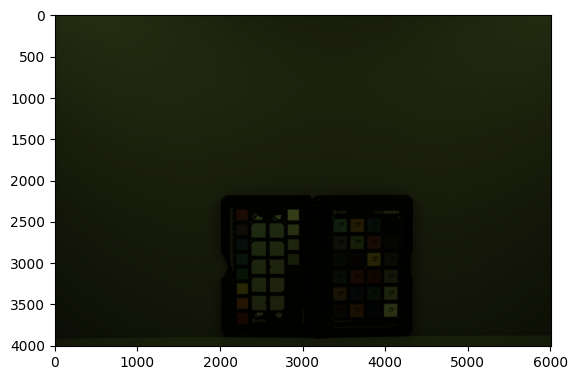

In [24]:
raw_image.show_colourchecker("XRCCPP", show_image=True, method="matplotlib")

In [25]:
path_out  = os.path.join(*["res", "img", "raw_rgb_colourckecker_24.png"]) # your path here
raw_image.show_colourchecker("XRCCPP", show_image=False, save_image=True, output_path=path_out, bits=16)

In [26]:
raw_image.colourchecker_RGB.keys()

dict_keys(['XRCCPP'])

To get a ColourCheckerRGB (it must have been extracted from the image beforehand):

In [27]:
colourchecker = raw_image.get_ColourCheckerRGB("XRCCPP")

In [28]:
type(colourchecker)

coolpi.image.colourchecker.ColourCheckerRGB

To get the ColourCheckerRGB attributes:

In [29]:
print(colourchecker.type)
print(colourchecker.subtype)
print(colourchecker.name)
print(colourchecker.illuminant)
print(colourchecker.observer)
#print(XRCCPP_RGB.patches) # RGB data as dict
print(colourchecker.patches_id)
print(colourchecker.metadata.keys()) # Measurement information as dict

ColourChecker object
ColourChecker RGB data
XRCCPP
MeasuredIlluminant object: Illuminant JNA.
2º standard observer (CIE 1931)
dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'])
dict_keys(['Camera', 'image_size', 'Date', 'ColorChecker', 'illuminant', 'observer', 'path_raw'])


As pandas DataFrame:

In [30]:
colourchecker.as_pandas_dataframe()

,patch_id,illuminant,R,G,B
0,A1,MeasuredIlluminant object: Illuminant JNA.,482.886531,390.464898,117.544490
1,A2,MeasuredIlluminant object: Illuminant JNA.,1614.637551,1226.942857,415.172857
2,A3,MeasuredIlluminant object: Illuminant JNA.,535.508571,809.533061,440.283469
3,A4,MeasuredIlluminant object: Illuminant JNA.,424.723265,593.810612,161.207347
4,A5,MeasuredIlluminant object: Illuminant JNA.,935.194490,1075.454490,586.328776
5,A6,MeasuredIlluminant object: Illuminant JNA.,975.542449,2012.114490,826.438776
6,B1,MeasuredIlluminant object: Illuminant JNA.,1703.389184,994.461939,164.120408
7,B2,MeasuredIlluminant object: Illuminant JNA.,331.645306,524.998367,418.512653
8,B3,MeasuredIlluminant object: Illuminant JNA.,1486.326122,623.832449,199.253469
9,B4,MeasuredIlluminant object: Illuminant JNA.,396.616327,297.518776,178.144490


To get the RGB data of a given patch from a *ColourCheckerRGB*:

In [31]:
raw_image.get_patch_from_colourchecker("XRCCPP", "D3")

(1242.0461224489795, 1497.2044897959183, 575.5077551020408)

In case of introducing a colour checker name or patch which is not in image, a `ColourCheckerError` or a `PatchError`is raised.  

In [32]:
raw_image.get_patch_from_colourchecker("XRCCP", "P1")

ColourCheckerError: ColourChecker not present on image: dict_keys(['XRCCPP'])

In [33]:
raw_image.get_patch_from_colourchecker("XRCCPP", "P1")

PatchError: Patch id not present in the ColourChecker XRCCPP

## White balance multipliers

To get the camera white balance multipliers from `raw_attributes`:

In [34]:
wb_camera = raw_image.get_camera_whitebalance()
print(wb_camera)

[2.05078125, 1.0, 1.3984375, 1.0]


To get the camera daylight white balance multipliers from `raw_attributes`:

In [35]:
wb_daylight = raw_image.get_daylight_whitebalance()
print(wb_daylight)

[2.178001880645752, 0.9379902482032776, 1.199445366859436, 0.0]


To `compute` the wb multipliers using a grey/white patch data from a `ColourCheckerRGB`:

In [36]:
params = dict(checker_name ="XRCCPP", patch_id="D3")

In [37]:
wb_multipliers = raw_image.compute_wb_multipliers(**params)
print(wb_multipliers)

[1.2054338906866322, 1.0, 2.6015366022834137, 1.0]


To `compute` the wb multipliers using the rgb patch data:

In [38]:
F1 = raw_image.extract_rgb_patch_data_from_image([2469,3490], 70) # "F1"

params = dict(patch_rgb=F1)

wb_multipliers = raw_image.compute_wb_multipliers(**params)
print(wb_multipliers)

[1.1864836313859786, 1.0, 2.634084193211164, 1.0]


To `estimate` the wb multipliers of the image using a white balance algorithm:

In [39]:
params = dict(algorithm="GreyWorld", remove_colourckecker=False, corners_colourchecker=None) # "Average", "GreyWorld", "MaxWhite", "Retinex"

In [40]:
wb_multipliers = raw_image.estimate_wb_multipliers(method="wb_algorithm", **params)
print(wb_multipliers)

[1.1819318260252276, 1.0, 2.6141549545808727, 1.0]


It is possible to remove a *ColourCheckerRGB* from the image to estimate the wb multipliers as follows:

In [41]:
params = dict(algorithm="GreyWorld", remove_colourckecker=True, corners_colourchecker= {"TopLeft":[1903,2120], "BottomRight":[4357,3940]})

In [42]:
wb_multipliers = raw_image.estimate_wb_multipliers(method="wb_algorithm", **params)
print(wb_multipliers)

[1.185231902633312, 1.0, 2.6140221628290856, 1.0]


To `estimate` the wb multipliers of the image from the illuminant:

In [43]:
wb_multipliers = raw_image.estimate_wb_multipliers(method="illuminant")
print(wb_multipliers)

[1.2151604453345477, 1.0, 2.8910047176851696, 1.0]


If the *RawImage* object doesnot have an RGB to XYZ colour transformation matrix assigned, the camera embedded matrix is used for the estimation of the white balance multipliers.

To use a computed colour transformation matrix, it must be entered beforehand. Otherwise, a `ClassMethodError` is raised.

It is possible to set the computed RGB to XYZ matrix as follows:

In [44]:
RGB_to_XYZ_WPP = np.array([[0.6953,0.0599,0.1632], [0.2817, 0.7431, -0.1077], [0.0915,-0.3027,1.1328]])

In [45]:
raw_image.set_RGB_to_XYZ_matrix(RGB_to_XYZ_WPP)

Then, it is possible to compute the wb multipliers as follows:

In [46]:
params = dict(use_transform_matrix="computed")

In [47]:
wb_multipliers = raw_image.estimate_wb_multipliers(method="illuminant", **params)
print(wb_multipliers)

[1.181107859183091, 1.0, 2.604392502578406, 1.0]


### To set the WB multipliers:

Options: from camera metadata "camera" or "daylight", user as `list` [r_gain, g_gain, b_gain, g_gain] or None [1,1,1,1].

In [48]:
raw_image.set_whitebalance_multipliers(wb_multipliers = [1.205344834215299, 1.0, 2.6013444028839836, 1.0])

In [49]:
raw_image.whitebalance_multipliers # same as raw_image.get_whitebalance_multipliers()

[1.205344834215299, 1.0, 2.6013444028839836, 1.0]

In [50]:
wb_multipliers = raw_image.get_whitebalance_multipliers()
print(wb_multipliers)

[1.205344834215299, 1.0, 2.6013444028839836, 1.0]


## White Balanced Image

To obtain the white balanced image:

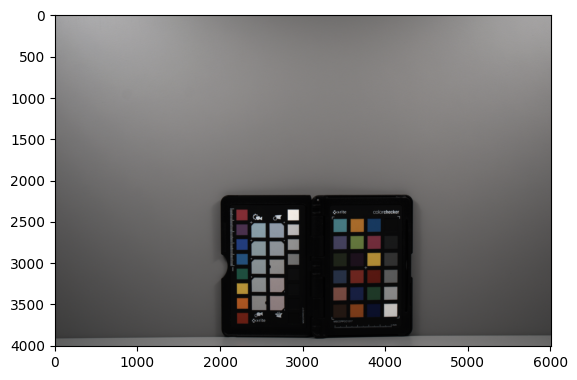

In [51]:
raw_image.apply_white_balance(show_image=True, method="matplotlib")

In [52]:
path_out  = os.path.join(*["res", "img", "raw_rgb_wb_image.png"]) # your path here
raw_image.apply_white_balance(show_image=False, save_image=True, output_path=path_out, bits=16)

To get the white balanced image:

In [53]:
raw_rgb_wb = raw_image.get_raw_rgb_white_balanced_image()
type(raw_rgb_wb)

numpy.ndarray

## RAW Colour Image Processing:

RAW RGB --> XYZ D65 ---> sRGB linear ---> sRGB non linear

To set the computed RGB to XYZ colour transform matrix:

In [54]:
RGB_to_XYZ_WPP = np.array([[0.6953,0.0599,0.1632], [0.2817, 0.7431, -0.1077], [0.0915,-0.3027,1.1328]])
raw_image.set_RGB_to_XYZ_matrix(RGB_to_XYZ_WPP)

Once the transformation matrix has been entered, the colour-corrected image can be obtained as follows:

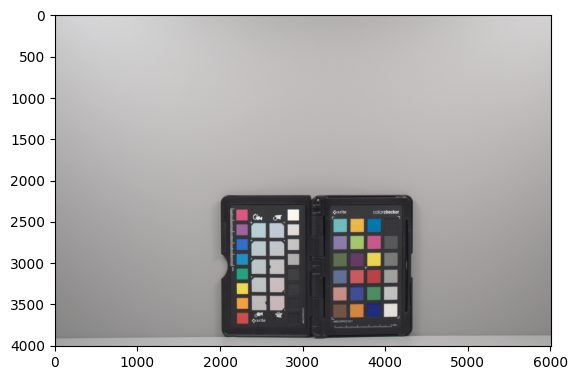

In [55]:
raw_image.apply_colour_correction(show_image=True, method="matplotlib")

To obtain the colour-corrected image, it is necessary to have entered the RGB to XYZ transformation matrix to be used. If not, the one provided by the camera manufacturer will be used by default if it is available in the `raw_attributes` of the *RawImage*.

In addition, the wb multipliers must have been specified beforehand.

To get the colour-corrected image:

In [56]:
sRGB_non_linear = raw_image.get_colour_corrected_image()
type(sRGB_non_linear)

numpy.ndarray

In [57]:
path_out  = os.path.join(*["res", "img", "raw_colour_corrected_image.png"]) # your path here
raw_image.apply_colour_correction(show_image=False, save_image=True, output_path=path_out, bits=16)

## Image colour quality assesment

Once the colour-corrected image has been obtained, colorimetric analysis of the result can be performed. For the evaluation of the image it is required that a colour checker appears in the image. In this case, please extract first the RGB data from the image by the class method `.extract_colourchecker_rgb_patches(checker_name, corners_image, size_rect)`. Thus, the transformation from RAW RGB to CIE XYZ (under CIE illuminant D65) can then be performed using the transformation matrix set to the *RawImage* object.

In [58]:
colourchecker_metrics = raw_image.compute_image_colour_quality_assessment(checker_name="XRCCPP")
colourchecker_metrics

,patch_id,illuminant_x,X,Y,Z,illuminant_y,X',Y',Z',resX,resY,resZ,LAB(D65),LAB'(D65),DeltaE,CIEDE2000
0,A1,Illuminant object: CIE D65 standard illuminant,11.461292,10.499093,7.333347,MeasuredIlluminant object: Illuminant JNA.,11.285187,10.513396,7.542106,0.176104,-0.014303,-0.208759,"(38.7236749214733, 11.149824958885862, 12.9779...","(38.748512966803816, 9.77102413797995, 12.2558...",1.556649,1.186388
1,A2,Illuminant object: CIE D65 standard illuminant,36.139914,33.333541,24.565403,MeasuredIlluminant object: Illuminant JNA.,37.210729,32.962643,27.365690,-1.070815,0.370898,-2.800286,"(64.43007459528734, 15.559058045400754, 16.917...","(64.13064998695782, 20.39260783350644, 11.9398...",6.944475,5.743922
2,A3,Illuminant object: CIE D65 standard illuminant,16.392163,17.310548,32.013831,MeasuredIlluminant object: Illuminant JNA.,16.099443,16.459574,30.667963,0.292720,0.850975,1.345868,"(48.648968148495356, -0.3379338972949175, -21....","(47.571752455131694, 2.6385840655802073, -21.4...",3.165620,3.220537
3,A4,Illuminant object: CIE D65 standard illuminant,10.301120,12.880394,7.167903,MeasuredIlluminant object: Illuminant JNA.,11.965006,14.495814,9.911673,-1.663886,-1.615420,-2.743770,"(42.58247365846941, -14.116283885252074, 20.24...","(44.935754769662594, -12.059252784334118, 15.0...",6.029163,3.610448
4,A5,Illuminant object: CIE D65 standard illuminant,22.524514,21.288885,40.342472,MeasuredIlluminant object: Illuminant JNA.,25.124667,23.104641,41.003570,-2.600154,-1.815755,-0.661098,"(53.26422236464833, 10.870609414894872, -24.22...","(55.17995816916864, 14.088543223262029, -21.70...",4.515366,4.141831
5,A6,Illuminant object: CIE D65 standard illuminant,30.421026,41.938149,45.518515,MeasuredIlluminant object: Illuminant JNA.,33.485210,42.642509,55.143713,-3.064184,-0.704360,-9.625198,"(70.82825539938143, -32.23370106800261, 0.1572...","(71.31165848873314, -23.19905205144407, -8.883...",12.790600,8.077972
6,B1,Illuminant object: CIE D65 standard illuminant,36.188577,29.164687,6.762448,MeasuredIlluminant object: Illuminant JNA.,36.338069,31.319183,9.007564,-0.149492,-2.154496,-2.245116,"(60.92669912223427, 30.822328290898817, 53.427...","(62.7761582952308, 23.348855342670284, 48.6745...",9.048133,3.915796
7,B2,Illuminant object: CIE D65 standard illuminant,13.888956,12.054751,39.811279,MeasuredIlluminant object: Illuminant JNA.,10.483989,8.738708,30.233436,3.404967,3.316042,9.577843,"(41.30300525372631, 16.369088062114013, -44.21...","(35.47626981886896, 17.916322022280774, -41.72...",6.522455,5.505028
8,B3,Illuminant object: CIE D65 standard illuminant,27.418704,18.466291,13.734772,MeasuredIlluminant object: Illuminant JNA.,29.977893,20.652774,13.420416,-2.559189,-2.186483,0.314356,"(50.056853112048444, 45.65453248291229, 13.586...","(52.567364234564096, 44.808180746968404, 18.68...",5.746752,3.913827
9,B4,Illuminant object: CIE D65 standard illuminant,8.714971,6.529686,14.704162,MeasuredIlluminant object: Illuminant JNA.,9.279691,6.940169,12.667037,-0.564719,-0.410483,2.037126,"(30.711314042614333, 24.128692632325947, -22.0...","(31.67031349087015, 24.763584217171204, -15.44...",6.728481,4.089256


In [59]:
colourchecker_metrics.describe()

,X,Y,Z,X',Y',Z',resX,resY,resZ,DeltaE,CIEDE2000
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,25.327845,25.650772,24.369187,27.055371,27.063552,25.622059,-1.727526,-1.412780,-1.252872,7.409008,4.500208
std,17.342450,18.814332,20.348651,18.213000,19.862551,18.769872,3.707281,4.352642,4.715447,5.189757,2.267362
min,3.179926,3.350388,3.882483,3.805679,3.670027,4.649771,-11.036176,-12.946376,-10.569120,1.124995,1.186388
25%,13.282040,12.001534,8.598151,11.795051,13.500210,12.265114,-2.716161,-2.162493,-3.183346,3.070127,2.793719
50%,20.873595,19.064697,17.784573,24.192849,21.117220,20.475220,-0.957612,-0.642588,-0.714193,6.275809,4.110522
75%,33.142437,35.328984,37.989038,36.556234,37.043057,32.573647,0.205258,0.852421,1.518683,11.483689,5.869562
max,76.046735,80.507039,85.127721,71.822635,75.319404,79.771617,4.224100,5.187635,9.577843,18.124229,10.079128


In [60]:
colourchecker_metrics["CIEDE2000"].mean()

4.500208139893018

The computed CIE XYZ data shall be compared with the CIE XYZ measured with colourimetric instruments as reference 
(loaded automatically from coolpy resources if available, or introduced by users as `data` parameter).

In [61]:
from coolpi.image.image_objects import ColourCheckerSpectral

In [62]:
XRCCPP = ColourCheckerSpectral("XRCCPP")
XRCCPP_XYZ = XRCCPP.to_ColourCheckerXYZ()

In [63]:
colourchecker_metrics = raw_image.compute_image_colour_quality_assessment(checker_name="XRCCPP", data = XRCCPP_XYZ)
colourchecker_metrics["CIEDE2000"].mean()

4.500208139893018

## Plot

To plot the RAW RGB Histogram:

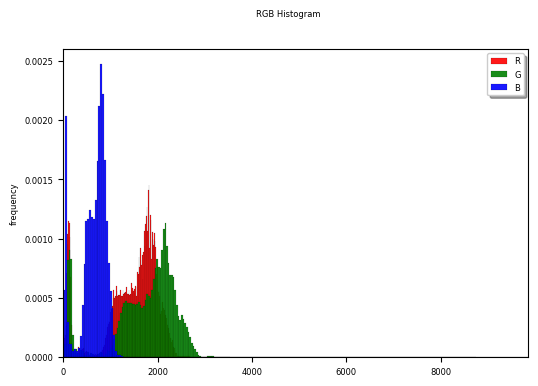

In [64]:
raw_image.plot_rgb_histogram()

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [65]:
path_hist  = os.path.join(*["res", "plot", "raw_rgb_histo.png"]) # your path here
raw_image.plot_rgb_histogram(show_figure=False, save_figure=True, output_path=path_hist)

Also, it is possible to plot the RAW RGB Histogram per channel as follows:

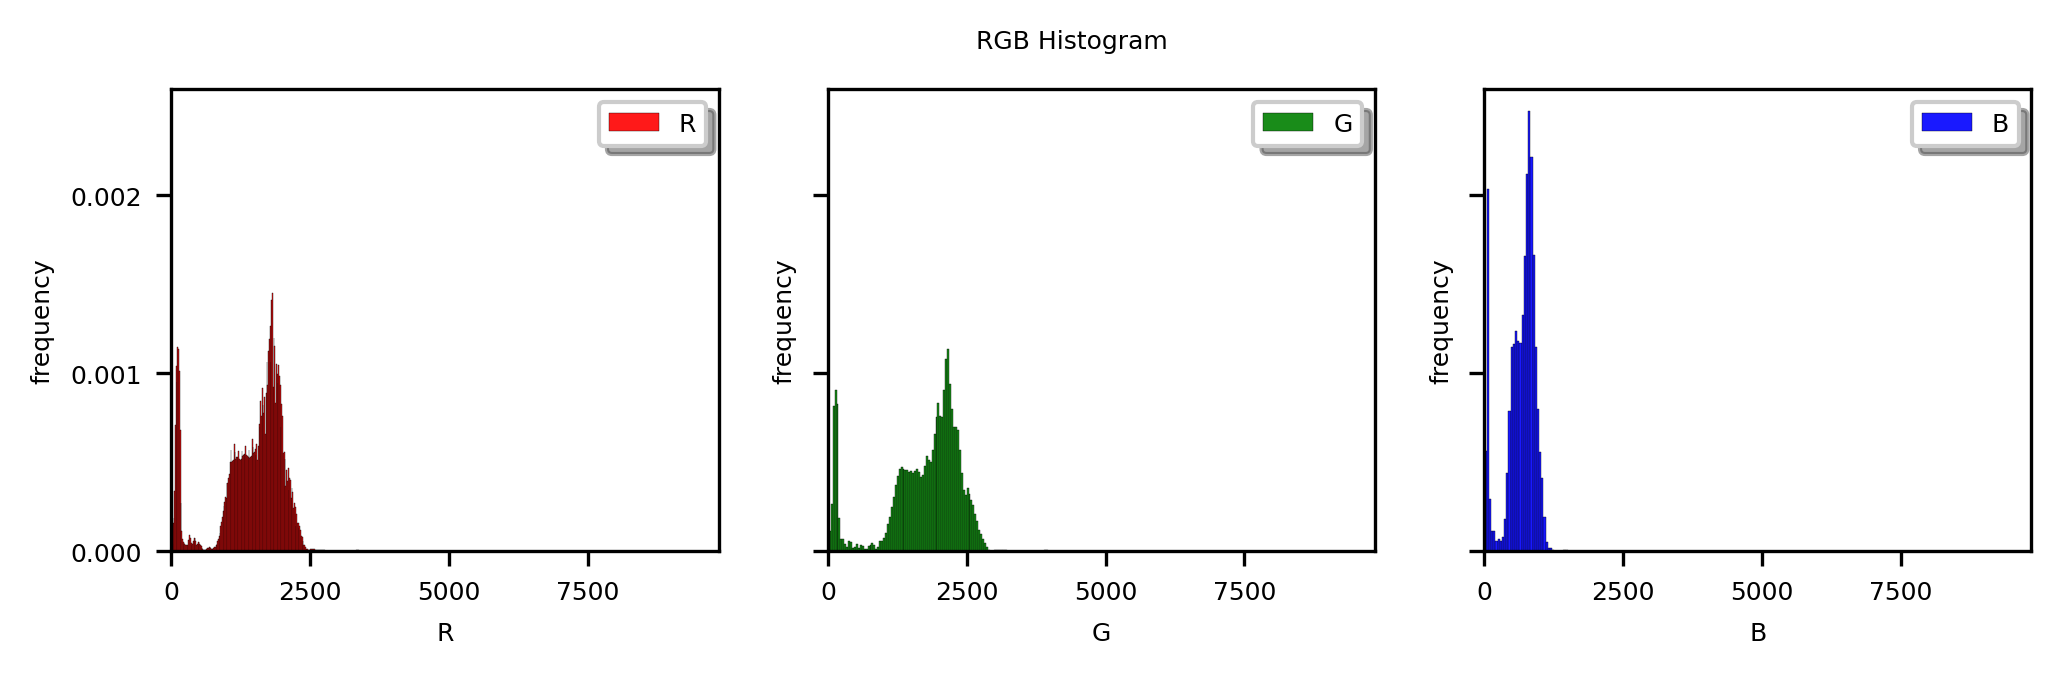

In [66]:
raw_image.plot_rgb_histogram(split_per_channel=True)

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [67]:
path_hist  = os.path.join(*["res", "plot", "raw_rgb_histo_split_per_channel.png"]) # your path here
raw_image.plot_rgb_histogram(show_figure=False, save_figure=True, output_path=path_hist, split_per_channel=True)

## Show

### Show ColourCheckerRGB

Once a *ColourCheckerRGB* object has been extracted from the *RawImage*, it is possible to draw the extracted patches on a new image as a visual aid to check the process.

To show the *ColourcheckerRGB*:

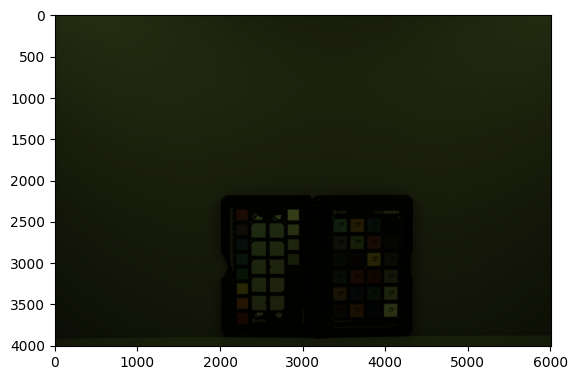

In [68]:
raw_image.show_colourchecker("XRCCPP", show_image=True, method="matplotlib")

In [69]:
path_out  = os.path.join(*["res", "img", "raw_rgb_colourckecker_24.png"]) # your path here
raw_image.show_colourchecker("XRCCPP", show_image=False, save_image=True, output_path=path_out, bits=16)

### Show Image

To display the RAW RGB image (“raw”), the white balanced image (“wb”) or the final sRGB image (“sRGB”), simply enter the required parameters as follows:

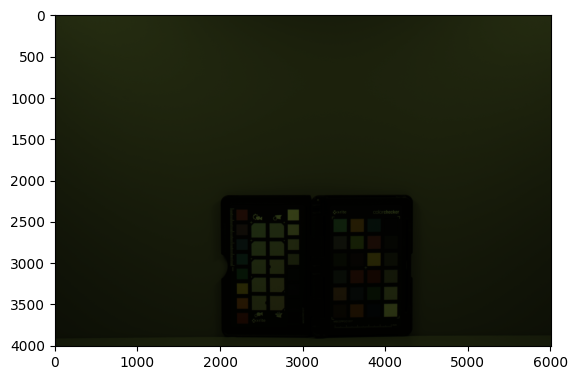

In [70]:
raw_image.show(data="raw", method="matplotlib")

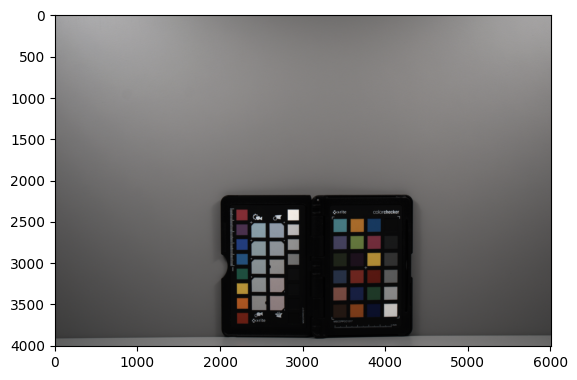

In [71]:
raw_image.show(data="wb", method="matplotlib")

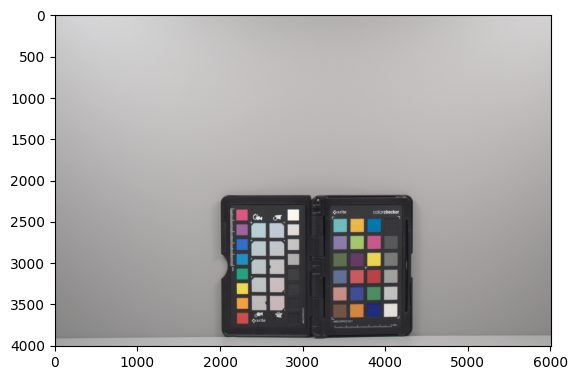

In [72]:
raw_image.show(data="sRGB", method="matplotlib")

## Save

To save the RAW RGB image (“raw”), the white balanced image (“wb”) or the final sRGB image (“sRGB”), simply enter the required parameters as follows:

In [73]:
path_out  = os.path.join(*["res", "img", "raw_rgb_data.tif"]) # your path here
raw_image.save(output_path=path_out, data = "raw", bits=16)

# ProcessedImage

In [74]:
from coolpi.image.image_objects import ProcessedImage

### To create an instance:

To create an instance of the `ProcessedImage` class, simply enter the required parameters as follows:

In [75]:
file_tif = ["res", "img", "custom_image_processing_wb_16bits.tif"]
path_tif  = os.path.join(*file_tif)

Optional

In [76]:
metadata = {"Camera": "Nikon D5600", "Date": [[2022, 6, 19], [8, 29, 00]], "ColorChecker": "XRCCPP", "illuminant":JNA, "observer": 2}

Note: The *RawImage* metadata can be set separately with the method `.set_metadata(metadata)`

Note: The *RawImage* illuminant and observer can be set separately with the method 

`.set_image_illuminant(illuminant)`

`.set_obsserver(observer)`

In [77]:
processed_image = ProcessedImage(path_img=path_tif, rgb_data=None, metadata=metadata)

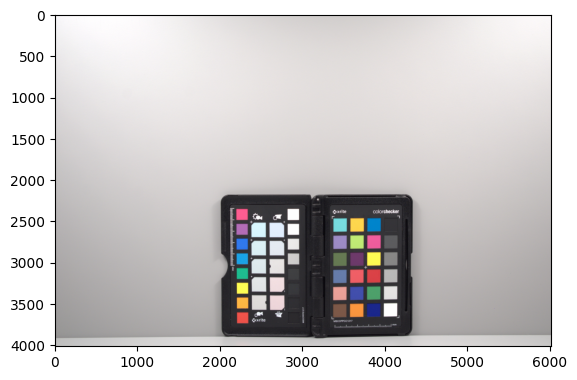

In [78]:
processed_image.show(method="matplotlib")

In [79]:
print(processed_image.rgb_data.shape)
print(processed_image.rgb_data[:,:,0].min(), processed_image.rgb_data[:,:,0].max())
print(processed_image.rgb_data[:,:,1].min(), processed_image.rgb_data[:,:,1].max())
print(processed_image.rgb_data[:,:,2].min(), processed_image.rgb_data[:,:,2].max())

(4016, 6016, 3)
0 65535
0 65535
0 65535


## Attributes

In [80]:
print(processed_image.type)
print(processed_image.subtype)
print(processed_image.path)
print(processed_image.rgb_data.shape)
print(processed_image.metadata)
print(processed_image.illuminant)
print(processed_image.observer)

Image object
Processed Image object
res/img/custom_image_processing_wb_16bits.tif
(4016, 6016, 3)
{'Camera': 'Nikon D5600', 'Date': [[2022, 6, 19], [8, 29, 0]], 'ColorChecker': 'XRCCPP', 'illuminant': <coolpi.colour.cie_colour_spectral.MeasuredIlluminant object at 0x7f9b28f5e5e0>, 'observer': 2}
MeasuredIlluminant object: Illuminant JNA.
2º standard observer (CIE 1931)


## Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [81]:
print(processed_image) # str method

ProcessedImage object from path: res/img/custom_image_processing_wb_16bits.tif


## Patch extraction

To extract the RGB data of a single patch from the image:

In [82]:
r_grey, g_grey, b_grey = processed_image.extract_rgb_patch_data_from_image([2469,3490], 70) # "F1"
print(r_grey, g_grey, b_grey)

57463.82326530612 56555.61612244898 55993.384081632656


### ColourChecker Extraction

The following colour checkers have been implemented:

- Calibrite PASSPORT PHOTO 2: "CCPP2_24", "CCPP2_26".
- Calibrite colorchecker PASSPORT VIDEO: "CCPPV_24", "CCPPV_3".
- Munsell Soil Color Book (Ed.1994): ColourChecker name and page, e.g. "MSCB1994_GLEY1", "MSCB1994_5Y".
- Munsell Soil Color Book (Ed.2009): ColourChecker name and page, e.g. "MSCB2009_GLEY1", "MSCB2009_GLEY2".
- Spyder Checker: SCK100_48, SCK100_7
- X-rite PASSPORT PHOTO: "XRCCPP_24", "XRCCPP_26"

Some of the colour checkers available in coolpy have been separated into smaller sections (either because of their shape, or because they are in single sheets like the Munsell Book).

The corner coordinates shall refer to the markings or crosses if present. In case the colour checker does not have any reference mark, the colour checker should be positioned horizontally so that there are more patches horizontally than vertically. The input coordinates then should correspond to the corners of the outer boundary formed by the colour patches.

For the Munsell Book, the corners to be entered will be the boundaries of the page without changing its position.

To extract the 24 colour patches from the XRCCPP colour checker:

In [83]:
colourchecker_name = "XRCCPP_24"
corners = {"TopLeft":[3342.76,3680.96], "TopRight":[3345.91,2441.74], "BottomRight":[4162.87,2433.49], "BottomLeft":[4156.83,3669.2]}

In [84]:
processed_image.extract_colourchecker_rgb_patches(checker_name=colourchecker_name, corners_image=corners, size_rect=70)

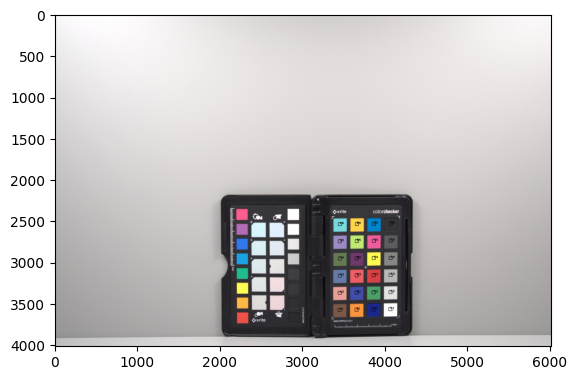

In [85]:
processed_image.show_colourchecker("XRCCPP", show_image=True, method="matplotlib")

In [86]:
path_out  = os.path.join(*["res", "img", "processed_rgb_colourckecker_24.png"])
processed_image.show_colourchecker("XRCCPP", show_image=False, save_image=True, output_path=path_out, bits=8)

In [87]:
processed_image.colourchecker_RGB.keys()

dict_keys(['XRCCPP'])

To get a *ColourCheckerRGB* (it must have been extracted from the image beforehand):

In [89]:
colourchecker = processed_image.get_ColourCheckerRGB("XRCCPP")

In [90]:
type(colourchecker)

coolpi.image.colourchecker.ColourCheckerRGB

Attributes:

In [91]:
print(colourchecker.type)
print(colourchecker.subtype)
print(colourchecker.name)
print(colourchecker.illuminant)
print(colourchecker.observer)
#print(XRCCPP_RGB.patches) # RGB data as dict
print(colourchecker.patches_id)
print(colourchecker.metadata.keys()) # Measurement information as dict

ColourChecker object
ColourChecker RGB data
XRCCPP
MeasuredIlluminant object: Illuminant JNA.
2º standard observer (CIE 1931)
dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'])
dict_keys(['Camera', 'Date', 'ColorChecker', 'illuminant', 'observer'])


As pandas DataFrame:

In [92]:
colourchecker.as_pandas_dataframe()

,patch_id,illuminant,R,G,B
0,A1,MeasuredIlluminant object: Illuminant JNA.,32138.868163,22851.327347,18644.679388
1,A2,MeasuredIlluminant object: Illuminant JNA.,60328.064694,41301.471224,39184.148776
2,A3,MeasuredIlluminant object: Illuminant JNA.,26358.236939,31919.909796,43685.330816
3,A4,MeasuredIlluminant object: Illuminant JNA.,26284.366939,31343.984490,21494.340408
4,A5,MeasuredIlluminant object: Illuminant JNA.,40285.009796,35969.546939,50676.523673
5,A6,MeasuredIlluminant object: Illuminant JNA.,30920.461633,56595.157551,57504.445714
6,B1,MeasuredIlluminant object: Illuminant JNA.,64815.737551,38825.310204,16260.107347
7,B2,MeasuredIlluminant object: Illuminant JNA.,16992.275102,20382.258571,44265.132245
8,B3,MeasuredIlluminant object: Illuminant JNA.,61615.512857,24441.087755,26253.827755
9,B4,MeasuredIlluminant object: Illuminant JNA.,28193.813878,14952.955918,27365.086939


To get the RGB data of a given patch from a *ColourCheckerRGB*:

In [93]:
processed_image.get_patch_from_colourchecker("XRCCPP", "D3")

(47612.109591836735, 47455.98775510204, 47447.257755102044)

In case of introducing a colour checker name or patch which is not in image, a `ColourCheckerError` or a `PatchError`is raised.  

In [94]:
processed_image.get_patch_from_colourchecker("XRCCP", "P1")

ColourCheckerError: ColourChecker not present on image: dict_keys(['XRCCPP'])

In [95]:
processed_image.get_patch_from_colourchecker("XRCCPP", "P1")

PatchError: Patch id not present in the ColourChecker XRCCPP

## Plot

To plot the RGB Histogram:

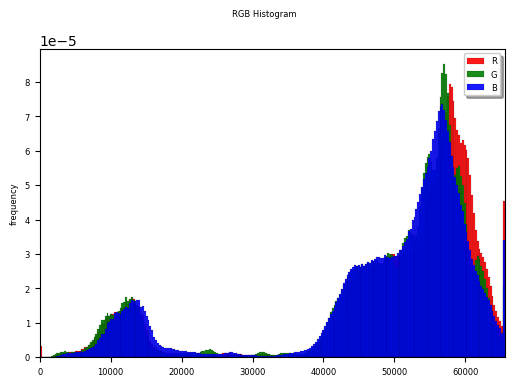

In [96]:
processed_image.plot_rgb_histogram()

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [97]:
path_hist  = os.path.join(*["res", "plot", "processed_rgb_histo.png"]) # your path here
processed_image.plot_rgb_histogram(show_figure=False, save_figure=True, output_path=path_hist)

Also, it is possible to plot the RGB Histogram per channel as follows:

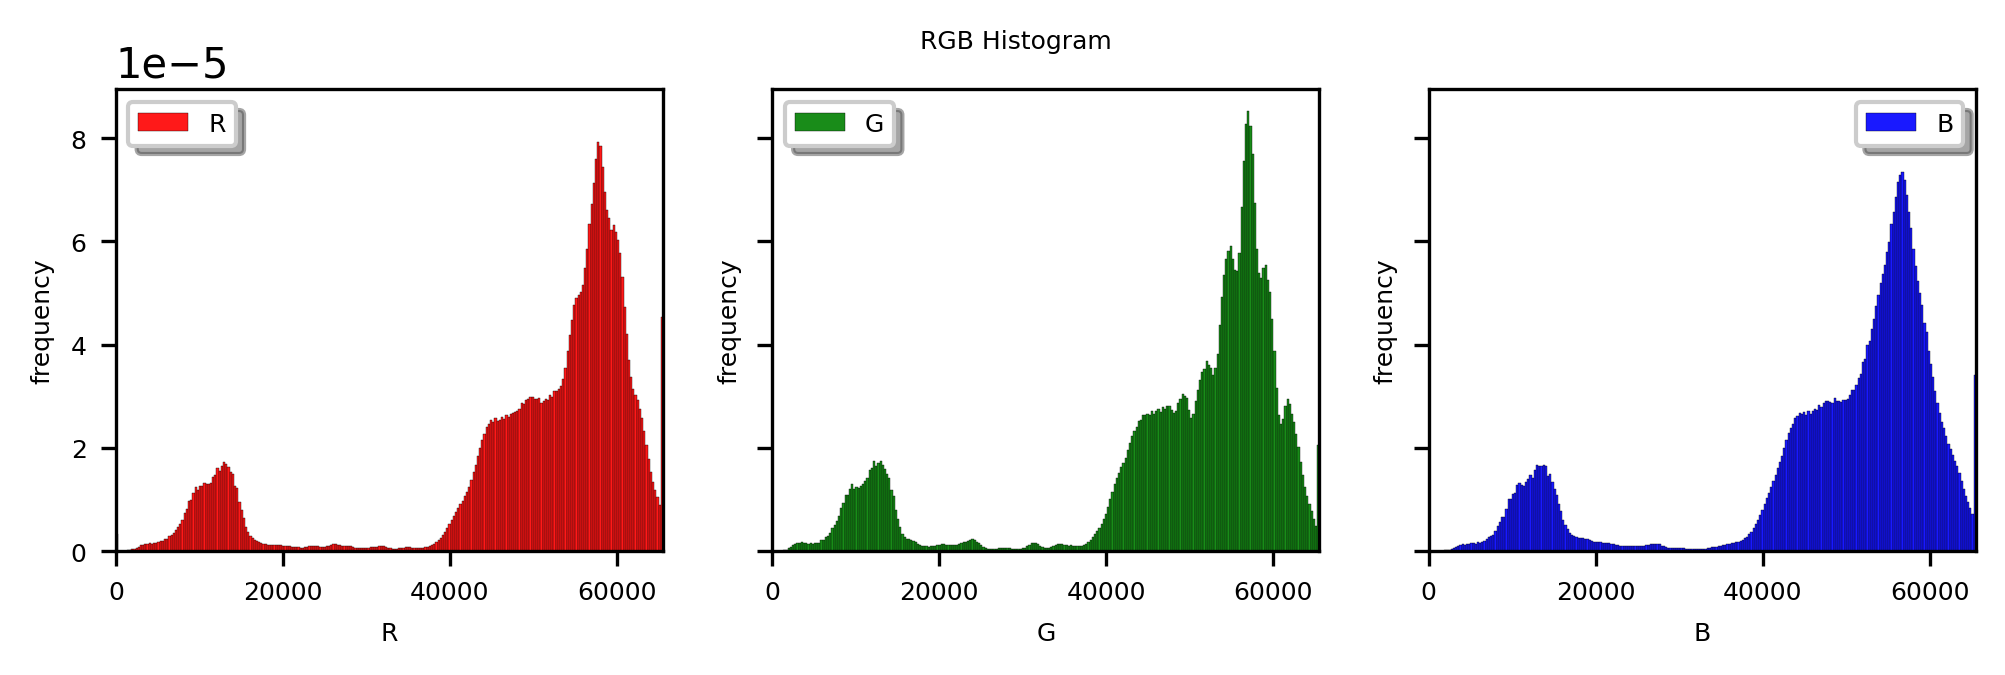

In [98]:
processed_image.plot_rgb_histogram(split_per_channel=True)

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [99]:
path_hist  = os.path.join(*["res", "plot", "processed_histo_split_per_channel.png"]) # your path here
processed_image.plot_rgb_histogram(show_figure=False, save_figure=True, output_path=path_hist, split_per_channel=True)

## Show

### Show ColourCheckerRGB

Once a *ColourCheckerRGB* object has been extracted from the *ProcessedImage*, it is possible to draw the extracted patches on a new image as a visual aid to check the process.

To show the *ColourcheckerRGB*:

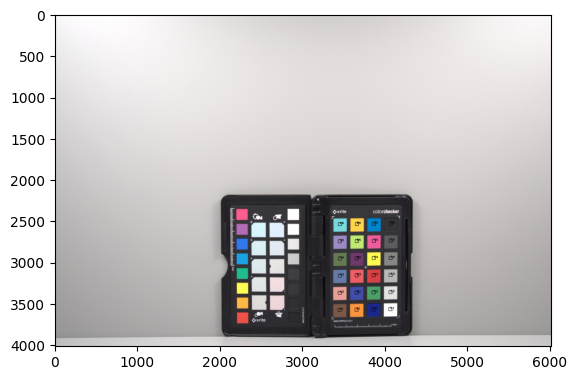

In [100]:
processed_image.show_colourchecker("XRCCPP", show_image=True, method="matplotlib")

In [101]:
path_out  = os.path.join(*["res", "img", "processed_rgb_colourckecker_24.png"]) # your path here
processed_image.show_colourchecker("XRCCPP", show_image=False, save_image=True, output_path=path_out, bits=8)

### Show Image

To display the RGB image data, simply enter the required parameters as follows:

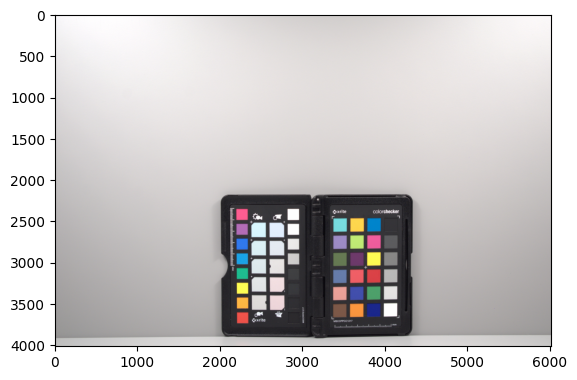

In [102]:
processed_image.show(method="matplotlib")

## Save

To save the RGB image data, simply enter the required parameters as follows:

In [ ]:
path_out  = os.path.join(*["res", "img", "proceessed_rgb_data.tif"]) # your path here
processed_image.save(output_path=path_out, bits=16)